In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'product': ['Apple', 'Orange', 'Banana', 'Carrot', 'Laptop', 'Phone', 'Shirt', 'Pants', 'Car', 'Bike'],
    'category': ['Electronics', 'Fruits', 'Fruits', 'Vegetables', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Automotive', 'Automotive'],
    'color': ['Red', 'Orange', 'Yellow', 'Orange', 'Black', 'White', 'Blue', 'Black', 'Red', 'Black'],
    'rating': [5, 4, 3, 2, 5, 4, 3, 4, 5, 4],
    'price': [1000, 1, 0.5, 1.2, 1500, 800, 20, 30, 20000, 500]
}

In [ ]:
df=pd.DataFrame(data)
df

,id,product,category,color,rating,price
0,1,Apple,Electronics,Red,5,1000.0
1,2,Orange,Fruits,Orange,4,1.0
2,3,Banana,Fruits,Yellow,3,0.5
3,4,Carrot,Vegetables,Orange,2,1.2
4,5,Laptop,Electronics,Black,5,1500.0
5,6,Phone,Electronics,White,4,800.0
6,7,Shirt,Clothing,Blue,3,20.0
7,8,Pants,Clothing,Black,4,30.0
8,9,Car,Automotive,Red,5,20000.0
9,10,Bike,Automotive,Black,4,500.0


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# create label encoding
label_encoder= LabelEncoder()
df['product_encoded']=label_encoder.fit_transform(df['product'])
df


,id,product,category,color,rating,price,product_encoded
0,1,Apple,Electronics,Red,5,1000.0,0
1,2,Orange,Fruits,Orange,4,1.0,6
2,3,Banana,Fruits,Yellow,3,0.5,1
3,4,Carrot,Vegetables,Orange,2,1.2,4
4,5,Laptop,Electronics,Black,5,1500.0,5
5,6,Phone,Electronics,White,4,800.0,8
6,7,Shirt,Clothing,Blue,3,20.0,9
7,8,Pants,Clothing,Black,4,30.0,7
8,9,Car,Automotive,Red,5,20000.0,3
9,10,Bike,Automotive,Black,4,500.0,2


In [ ]:
#one hot label encoding

df['category'].unique()

array(['Electronics', 'Fruits', 'Vegetables', 'Clothing', 'Automotive'],
      dtype=object)

one hot label encoding

In [ ]:
one_hot_enc=OneHotEncoder(sparse=False)
one_hot_encoded=one_hot_enc.fit_transform(df[['category']])
one_hot_encoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
one_hot_df=pd.DataFrame(one_hot_encoded,columns=one_hot_enc.get_feature_names_out(['category']))
df=pd.concat([df,one_hot_df],axis=1)
df


,id,product,category,color,rating,price,product_encoded,category_Automotive,category_Clothing,category_Electronics,category_Fruits,category_Vegetables
0,1,Apple,Electronics,Red,5,1000.0,0,0.0,0.0,1.0,0.0,0.0
1,2,Orange,Fruits,Orange,4,1.0,6,0.0,0.0,0.0,1.0,0.0
2,3,Banana,Fruits,Yellow,3,0.5,1,0.0,0.0,0.0,1.0,0.0
3,4,Carrot,Vegetables,Orange,2,1.2,4,0.0,0.0,0.0,0.0,1.0
4,5,Laptop,Electronics,Black,5,1500.0,5,0.0,0.0,1.0,0.0,0.0
5,6,Phone,Electronics,White,4,800.0,8,0.0,0.0,1.0,0.0,0.0
6,7,Shirt,Clothing,Blue,3,20.0,9,0.0,1.0,0.0,0.0,0.0
7,8,Pants,Clothing,Black,4,30.0,7,0.0,1.0,0.0,0.0,0.0
8,9,Car,Automotive,Red,5,20000.0,3,1.0,0.0,0.0,0.0,0.0
9,10,Bike,Automotive,Black,4,500.0,2,1.0,0.0,0.0,0.0,0.0


In [ ]:
data = {
    'id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'product': ['Apple', 'Orange', 'Banana', 'Carrot', 'Laptop', 'Phone', 'Shirt', 'Pants', 'Car', 'Bike'],
    'category': ['Electronics', 'Fruits', 'Fruits', 'Vegetables', 'Electronics', 'Electronics', 'Clothing', 'Clothing', 'Automotive', 'Automotive'],
    'color': ['Red', 'Orange', 'Yellow', 'Orange', 'Black', 'White', 'Blue', 'Black', 'Red', 'Black'],
    'rating': [5, 4, 3, 2, 5, 4, 3, 4, 5, 4],
    'price': [1000, 1, 0.5, 1.2, 1500, 800, 20, 30, 20000, 500]
}

In [ ]:
df2=pd.DataFrame(data)
df2

,id,product,category,color,rating,price
0,1,Apple,Electronics,Red,5,1000.0
1,2,Orange,Fruits,Orange,4,1.0
2,3,Banana,Fruits,Yellow,3,0.5
3,4,Carrot,Vegetables,Orange,2,1.2
4,5,Laptop,Electronics,Black,5,1500.0
5,6,Phone,Electronics,White,4,800.0
6,7,Shirt,Clothing,Blue,3,20.0
7,8,Pants,Clothing,Black,4,30.0
8,9,Car,Automotive,Red,5,20000.0
9,10,Bike,Automotive,Black,4,500.0


In [ ]:
df_encoded=pd.get_dummies(df2, columns=['color'],dtype=int, prefix ="c")
df_encoded

,id,product,category,rating,price,c_Black,c_Blue,c_Orange,c_Red,c_White,c_Yellow
0,1,Apple,Electronics,5,1000.0,0,0,0,1,0,0
1,2,Orange,Fruits,4,1.0,0,0,1,0,0,0
2,3,Banana,Fruits,3,0.5,0,0,0,0,0,1
3,4,Carrot,Vegetables,2,1.2,0,0,1,0,0,0
4,5,Laptop,Electronics,5,1500.0,1,0,0,0,0,0
5,6,Phone,Electronics,4,800.0,0,0,0,0,1,0
6,7,Shirt,Clothing,3,20.0,0,1,0,0,0,0
7,8,Pants,Clothing,4,30.0,1,0,0,0,0,0
8,9,Car,Automotive,5,20000.0,0,0,0,1,0,0
9,10,Bike,Automotive,4,500.0,1,0,0,0,0,0


In [ ]:
df_encoded=pd.get_dummies(df2, columns=['color'],dtype=int,drop_first=True, prefix ="c")
df_encoded

,id,product,category,rating,price,c_Blue,c_Orange,c_Red,c_White,c_Yellow
0,1,Apple,Electronics,5,1000.0,0,0,1,0,0
1,2,Orange,Fruits,4,1.0,0,1,0,0,0
2,3,Banana,Fruits,3,0.5,0,0,0,0,1
3,4,Carrot,Vegetables,2,1.2,0,1,0,0,0
4,5,Laptop,Electronics,5,1500.0,0,0,0,0,0
5,6,Phone,Electronics,4,800.0,0,0,0,1,0
6,7,Shirt,Clothing,3,20.0,1,0,0,0,0
7,8,Pants,Clothing,4,30.0,0,0,0,0,0
8,9,Car,Automotive,5,20000.0,0,0,1,0,0
9,10,Bike,Automotive,4,500.0,0,0,0,0,0


In [ ]:
#OrdinalEncoder

ord_enc=OrdinalEncoder(categories=[['Fruits','Vegetables',"Clothing","Electronics","Automotive"]])
df2['category_encoded']=ord_enc.fit_transform(df2[['category']])
df2

,id,product,category,color,rating,price,category_encoded
0,1,Apple,Electronics,Red,5,1000.0,3.0
1,2,Orange,Fruits,Orange,4,1.0,0.0
2,3,Banana,Fruits,Yellow,3,0.5,0.0
3,4,Carrot,Vegetables,Orange,2,1.2,1.0
4,5,Laptop,Electronics,Black,5,1500.0,3.0
5,6,Phone,Electronics,White,4,800.0,3.0
6,7,Shirt,Clothing,Blue,3,20.0,2.0
7,8,Pants,Clothing,Black,4,30.0,2.0
8,9,Car,Automotive,Red,5,20000.0,4.0
9,10,Bike,Automotive,Black,4,500.0,4.0


In [ ]:
ord_enc=OrdinalEncoder()
df2['rating_encoded']=ord_enc.fit_transform(df2[['rating']])
df2

,id,product,category,color,rating,price,category_encoded,rating_encoded
0,1,Apple,Electronics,Red,5,1000.0,3.0,3.0
1,2,Orange,Fruits,Orange,4,1.0,0.0,2.0
2,3,Banana,Fruits,Yellow,3,0.5,0.0,1.0
3,4,Carrot,Vegetables,Orange,2,1.2,1.0,0.0
4,5,Laptop,Electronics,Black,5,1500.0,3.0,3.0
5,6,Phone,Electronics,White,4,800.0,3.0,2.0
6,7,Shirt,Clothing,Blue,3,20.0,2.0,1.0
7,8,Pants,Clothing,Black,4,30.0,2.0,2.0
8,9,Car,Automotive,Red,5,20000.0,4.0,3.0
9,10,Bike,Automotive,Black,4,500.0,4.0,2.0


In [ ]:
df.head()

,id,product,category,color,rating,price,product_encoded,category_Automotive,category_Clothing,category_Electronics,category_Fruits,category_Vegetables
0,1,Apple,Electronics,Red,5,1000.0,0,0.0,0.0,1.0,0.0,0.0
1,2,Orange,Fruits,Orange,4,1.0,6,0.0,0.0,0.0,1.0,0.0
2,3,Banana,Fruits,Yellow,3,0.5,1,0.0,0.0,0.0,1.0,0.0
3,4,Carrot,Vegetables,Orange,2,1.2,4,0.0,0.0,0.0,0.0,1.0
4,5,Laptop,Electronics,Black,5,1500.0,5,0.0,0.0,1.0,0.0,0.0


Standard Scaler

In [ ]:
stad_scaler=StandardScaler()
df['price_scaled']=stad_scaler.fit_transform(df[['price']])


In [ ]:
df.head()

,id,product,category,color,rating,price,product_encoded,category_Automotive,category_Clothing,category_Electronics,category_Fruits,category_Vegetables,price_scaled
0,1,Apple,Electronics,Red,5,1000.0,0,0.0,0.0,1.0,0.0,0.0,-0.235080
1,2,Orange,Fruits,Orange,4,1.0,6,0.0,0.0,0.0,1.0,0.0,-0.404610
2,3,Banana,Fruits,Yellow,3,0.5,1,0.0,0.0,0.0,1.0,0.0,-0.404695
3,4,Carrot,Vegetables,Orange,2,1.2,4,0.0,0.0,0.0,0.0,1.0,-0.404576
4,5,Laptop,Electronics,Black,5,1500.0,5,0.0,0.0,1.0,0.0,0.0,-0.150230


In [ ]:
Min_scaler=MinMaxScaler()
df['price_Min_scaled']=Min_scaler.fit_transform(df[['price']])


In [ ]:
df.head()

,id,product,category,color,rating,price,product_encoded,category_Automotive,category_Clothing,category_Electronics,category_Fruits,category_Vegetables,price_scaled,price_Min_scaled
0,1,Apple,Electronics,Red,5,1000.0,0,0.0,0.0,1.0,0.0,0.0,-0.235080,0.049976
1,2,Orange,Fruits,Orange,4,1.0,6,0.0,0.0,0.0,1.0,0.0,-0.404610,0.000025
2,3,Banana,Fruits,Yellow,3,0.5,1,0.0,0.0,0.0,1.0,0.0,-0.404695,0.000000
3,4,Carrot,Vegetables,Orange,2,1.2,4,0.0,0.0,0.0,0.0,1.0,-0.404576,0.000035
4,5,Laptop,Electronics,Black,5,1500.0,5,0.0,0.0,1.0,0.0,0.0,-0.150230,0.074977


In [ ]:
import pandas as pd
import numpy as np

Using Dataset

In [ ]:
df3=pd.read_csv("/content/beer-servings.csv")
df3

,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia
1,1,Albania,89.0,132.0,54.0,4.9,Europe
2,2,Algeria,25.0,0.0,14.0,0.7,Africa
3,3,Andorra,245.0,138.0,312.0,12.4,Europe
4,4,Angola,217.0,57.0,45.0,5.9,Africa
...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia
190,190,Yemen,6.0,0.0,0.0,0.1,Asia
191,191,Zambia,32.0,19.0,4.0,2.5,Africa


In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler

# create label encoding
label_encoder_country= LabelEncoder()
df3['Country_encoded']=label_encoder_country.fit_transform(df3['country'])
df3


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Country_encoded
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,0
1,1,Albania,89.0,132.0,54.0,4.9,Europe,1
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,2
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,3
4,4,Angola,217.0,57.0,45.0,5.9,Africa,4
...,...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America,188
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia,189
190,190,Yemen,6.0,0.0,0.0,0.1,Asia,190
191,191,Zambia,32.0,19.0,4.0,2.5,Africa,191


one hot label encoding

In [ ]:
#one hot label encoding

df3['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [ ]:
one_hot_enc_continent=OneHotEncoder(sparse=False)
one_hot_encodedd=one_hot_enc_continent.fit_transform(df3[['continent']])
one_hot_encodedd

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.]])

In [ ]:
one_hot_df3=pd.DataFrame(one_hot_encodedd,columns=one_hot_enc_continent.get_feature_names_out(['continent']))
df3=pd.concat([df3,one_hot_df3],axis=1)
df3


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,Afghanistan,0.0,0.0,0.0,0.0,Asia,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Albania,89.0,132.0,54.0,4.9,Europe,1,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Algeria,25.0,0.0,14.0,0.7,Africa,2,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Andorra,245.0,138.0,312.0,12.4,Europe,3,0.0,0.0,1.0,0.0,0.0,0.0
4,4,Angola,217.0,57.0,45.0,5.9,Africa,4,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,188,Venezuela,NaN,100.0,3.0,7.7,South America,188,0.0,0.0,0.0,0.0,0.0,1.0
189,189,Vietnam,111.0,2.0,1.0,2.0,Asia,189,0.0,1.0,0.0,0.0,0.0,0.0
190,190,Yemen,6.0,0.0,0.0,0.1,Asia,190,0.0,1.0,0.0,0.0,0.0,0.0
191,191,Zambia,32.0,19.0,4.0,2.5,Africa,191,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df3.describe()

,Unnamed: 0,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,Country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
count,193.000000,185.000000,185.000000,187.000000,192.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,96.000000,105.124324,83.221622,50.165775,4.741667,96.000000,0.274611,0.227979,0.233161,0.119171,0.082902,0.062176
std,55.858452,100.524714,89.142958,80.358868,3.767654,55.858452,0.447479,0.420620,0.423943,0.324832,0.276450,0.242103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,20.000000,4.000000,1.000000,1.300000,48.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,96.000000,76.000000,60.000000,9.000000,4.250000,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,144.000000,185.000000,132.000000,60.500000,7.200000,144.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,192.000000,376.000000,438.000000,370.000000,14.400000,192.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df3.columns

Index(['Unnamed: 0', 'country', 'beer_servings', 'spirit_servings',
       'wine_servings', 'total_litres_of_pure_alcohol', 'continent',
       'Country_encoded', 'continent_Africa', 'continent_Asia',
       'continent_Europe', 'continent_North America', 'continent_Oceania',
       'continent_South America'],
      dtype='object')

In [ ]:
y=df3['total_litres_of_pure_alcohol']
x=df3[["beer_servings","spirit_servings","wine_servings"]]

In [ ]:
#x=df3.drop(columns=['total_litres_of_pure_alcohol','country','continent_Africa', 'continent_Asia',
    #  'continent_Europe', 'continent_North America', 'continent_Oceania',
    #  'continent_South America'],axis=1)

In [ ]:
x.shape

(193, 3)

In [ ]:
y.shape

(193,)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [ ]:
x=pd.DataFrame(x)
x.head()

,0,1,2
0,-1.048594,-0.936108,-0.625948
1,-0.160837,0.548678,0.047842
2,-0.799224,-0.936108,-0.451262
3,1.395232,0.616168,3.267059
4,1.115937,-0.294951,-0.064456


In [ ]:
scale_columns=['beer_servings', 'spirit_servings', 'wine_servings']
data2=df3.copy()
for col in scale_columns:
  data2[col]=sc.fit_transform(data2[[col]])

data2.head()


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,Afghanistan,0.000000,0.000000,0.000000,0.0,Asia,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Albania,0.236702,0.301370,0.145946,4.9,Europe,1,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Algeria,0.066489,0.000000,0.037838,0.7,Africa,2,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Andorra,0.651596,0.315068,0.843243,12.4,Europe,3,0.0,0.0,1.0,0.0,0.0,0.0
4,4,Angola,0.577128,0.130137,0.121622,5.9,Africa,4,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#second method using copy function

from sklearn.preprocessing import MinMaxScaler
data3=df3.copy()
scaler=MinMaxScaler()
for col in scale_columns:
  data3[col]=scaler.fit_transform(data3[[col]])

data3.head()


,Unnamed: 0,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,Country_encoded,continent_Africa,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America
0,0,Afghanistan,0.000000,0.000000,0.000000,0.0,Asia,0,0.0,1.0,0.0,0.0,0.0,0.0
1,1,Albania,0.236702,0.301370,0.145946,4.9,Europe,1,0.0,0.0,1.0,0.0,0.0,0.0
2,2,Algeria,0.066489,0.000000,0.037838,0.7,Africa,2,1.0,0.0,0.0,0.0,0.0,0.0
3,3,Andorra,0.651596,0.315068,0.843243,12.4,Europe,3,0.0,0.0,1.0,0.0,0.0,0.0
4,4,Angola,0.577128,0.130137,0.121622,5.9,Africa,4,1.0,0.0,0.0,0.0,0.0,0.0


Correlation matrix

In [ ]:
corr_columns=["beer_servings","spirit_servings","wine_servings","total_litres_of_pure_alcohol"]


corr_matrix=data3[corr_columns].corr()
corr_matrix

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.467451,0.551206,0.839577
spirit_servings,0.467451,1.000000,0.197567,0.667581
wine_servings,0.551206,0.197567,1.000000,0.668988
total_litres_of_pure_alcohol,0.839577,0.667581,0.668988,1.000000


<Axes: >

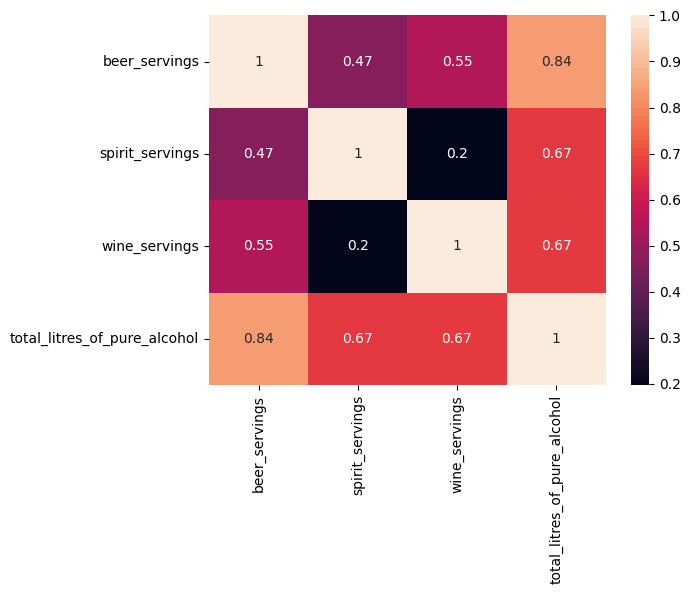

In [ ]:
import seaborn as sns
sns.heatmap(corr_matrix,annot=True)